In [1]:
# Import the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Import the data
filePath = 'data/penguins_size.csv'
data = pd.read_csv(filePath)

In [27]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis

In [28]:
data['species'].unique().tolist()

['Adelie', 'Chinstrap', 'Gentoo']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [30]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [31]:
# Check for the percentage of data to be drop
100*(10/344)

2.9069767441860463

In [32]:
# Drop all the NA
data = data.dropna()

In [33]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
#check for the unique content for the island
data['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [35]:
# Check for the unique sex
data['sex'].unique().tolist()

['MALE', 'FEMALE', '.']

In [36]:
# Check the record that has the "." for sex
data_sex = data[data['sex']=="."]
data_sex

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [37]:
data = data.replace('.',np.nan) 

In [39]:
data['sex'].unique().tolist()

['MALE', 'FEMALE', nan]

In [44]:
data['sex'] = data['sex'].fillna(data['sex'].mode())

In [45]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Visualization

<Figure size 2400x1600 with 0 Axes>

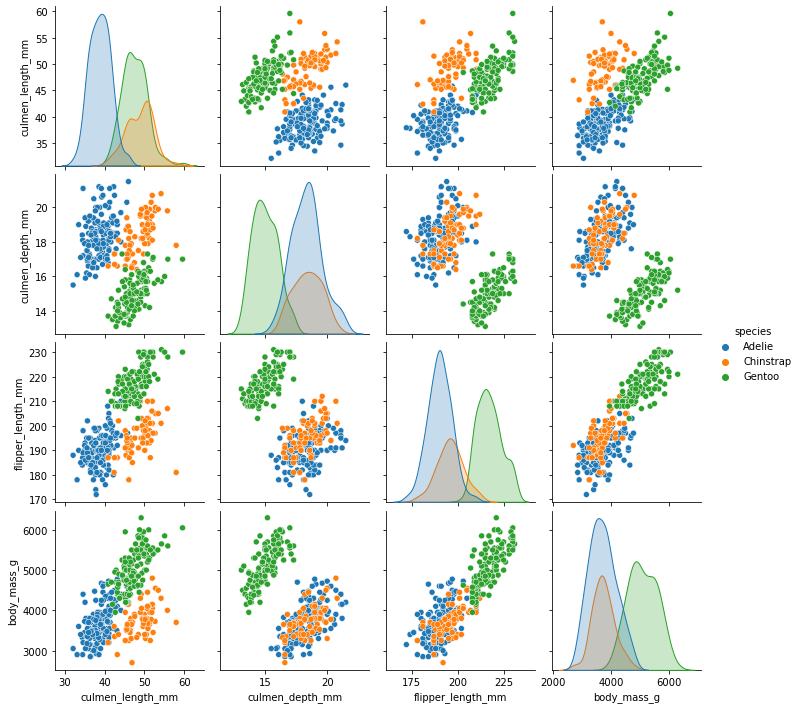

In [50]:
plt.figure(figsize=(12,8), dpi=200)
sns.pairplot(data=data, hue='species')

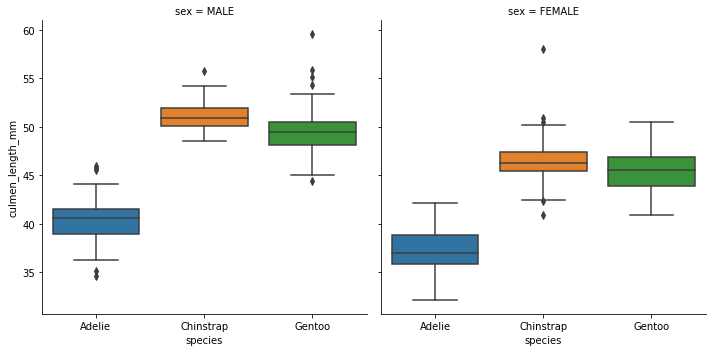

In [53]:
sns.catplot(x='species',y='culmen_length_mm', data=data, kind='box', col='sex')

## Feature Engineering

In [61]:
pd.get_dummies(data.drop('species', axis=1), drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train Test Split

In [68]:
X = pd.get_dummies(data.drop('species', axis=1), drop_first=True)
y = data['species']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree using default Parameters

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model = DecisionTreeClassifier()

In [74]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
base_predict = model.predict(X_test)

## Evaluation

In [76]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [78]:
confusion_matrix(y_test, base_predict)

array([[39,  2,  0],
       [ 4, 19,  0],
       [ 0,  0, 37]], dtype=int64)

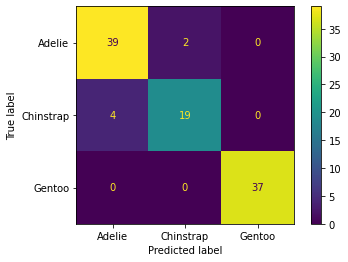

In [79]:
plot_confusion_matrix(model, X_test, y_test)

In [81]:
print(classification_report(y_test, base_predict))

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



In [82]:
model.feature_importances_

array([0.32352044, 0.04203954, 0.53120101, 0.01325074, 0.0681854 ,
       0.01017467, 0.0116282 ])

In [83]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.323520
culmen_depth_mm,0.042040
flipper_length_mm,0.531201
body_mass_g,0.013251
island_Dream,0.068185
island_Torgersen,0.010175
sex_MALE,0.011628


## Visualizing the tree

In [84]:
from sklearn.tree import plot_tree

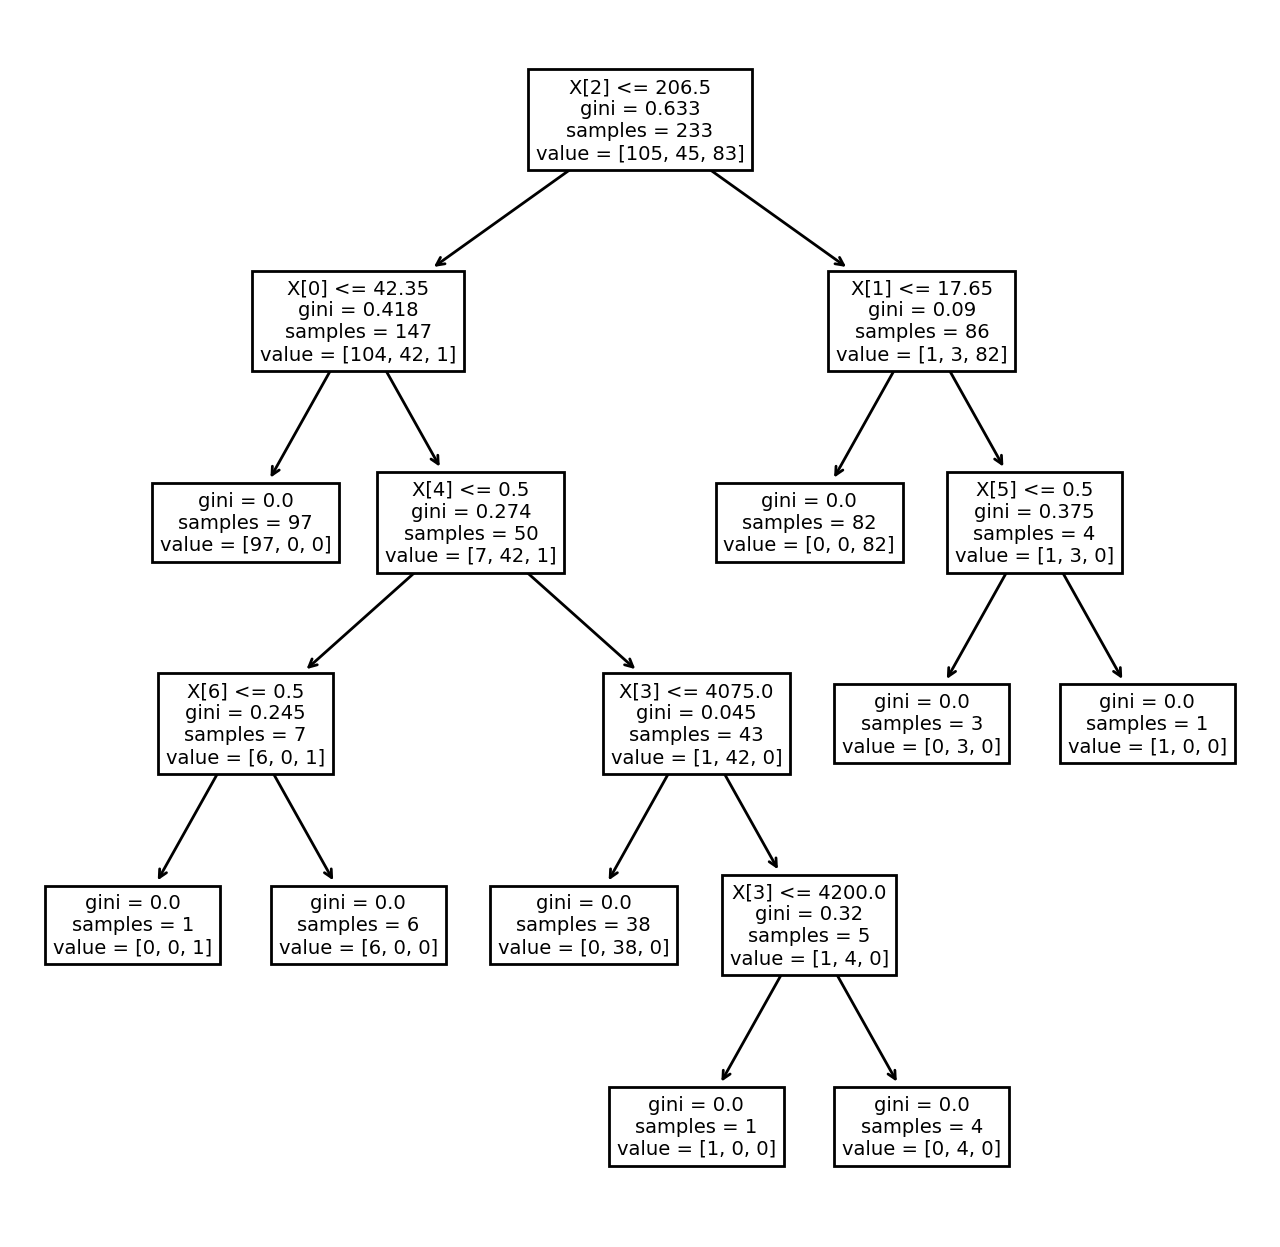

In [88]:
plt.figure(figsize=(8,8), dpi=200)
plot_tree(model);

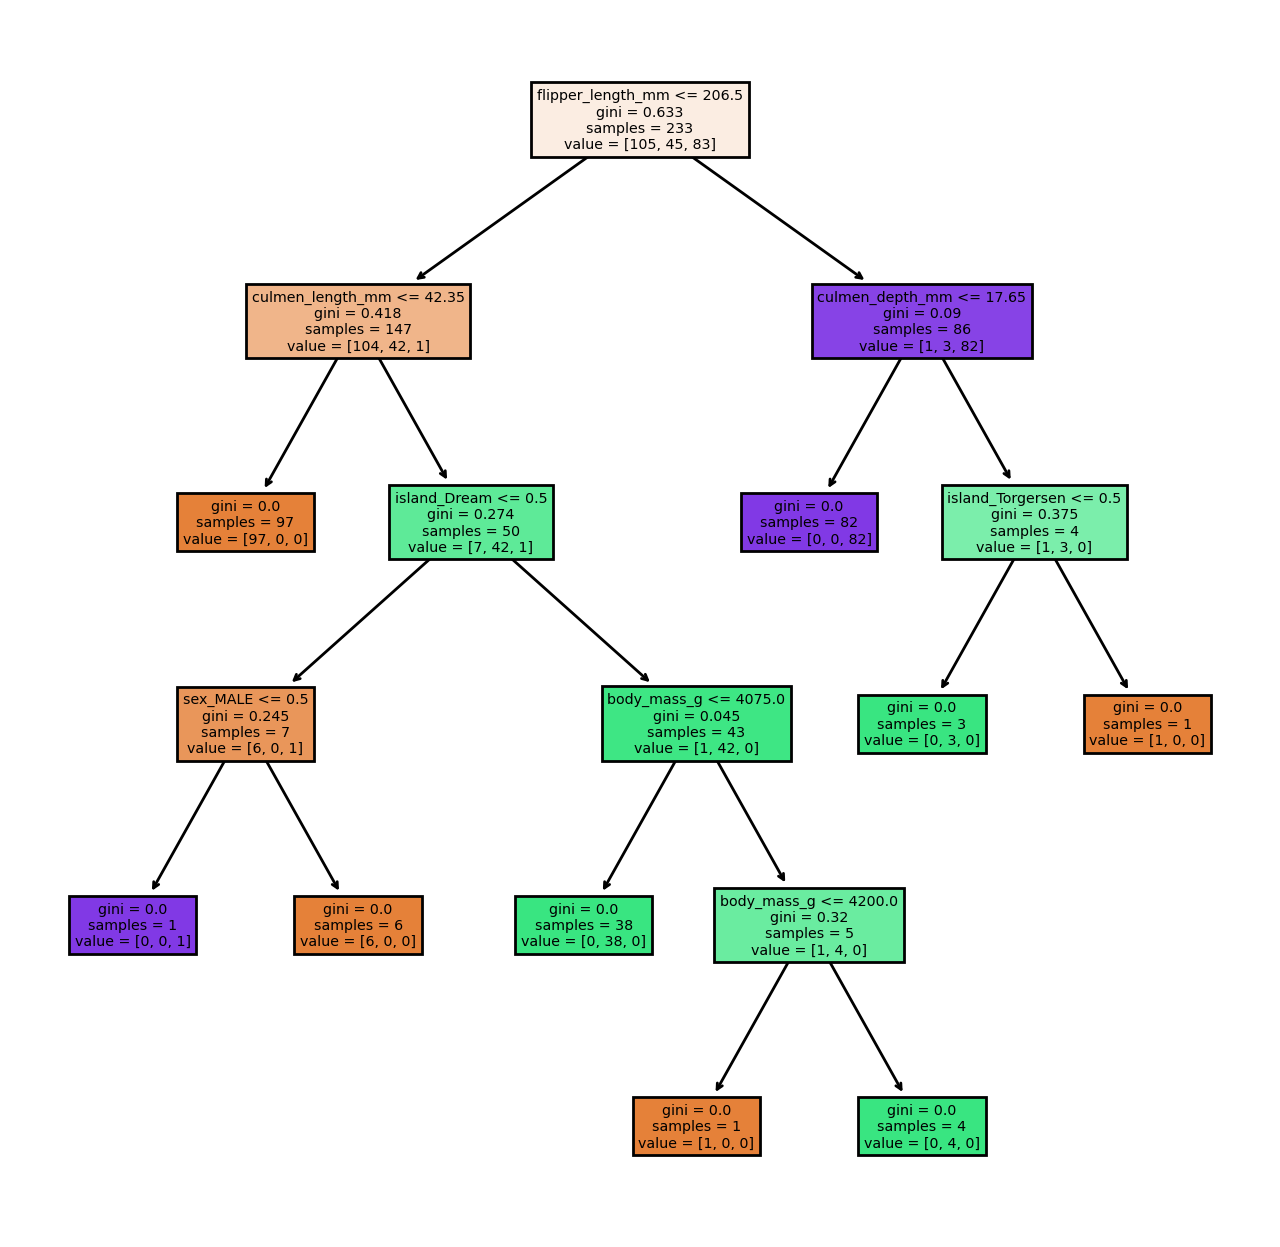

In [92]:
plt.figure(figsize=(8,8), dpi=200)
plot_tree(model, filled=True, feature_names=X.columns);

## Reporting the model Result

In [93]:
def ModelReport(model):
    model_predict = model.predict(X_test)
    print(classification_report(y_test, model_predict))
    print('\n')
    plt.figure(figsize=(8,8),dpi=200)
    plot_tree(model, filled=True, feature_names=X.columns);

Hyperparameter - Max Depth

In [94]:
prune_tree_model = DecisionTreeClassifier(max_depth=2) 

In [95]:
prune_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





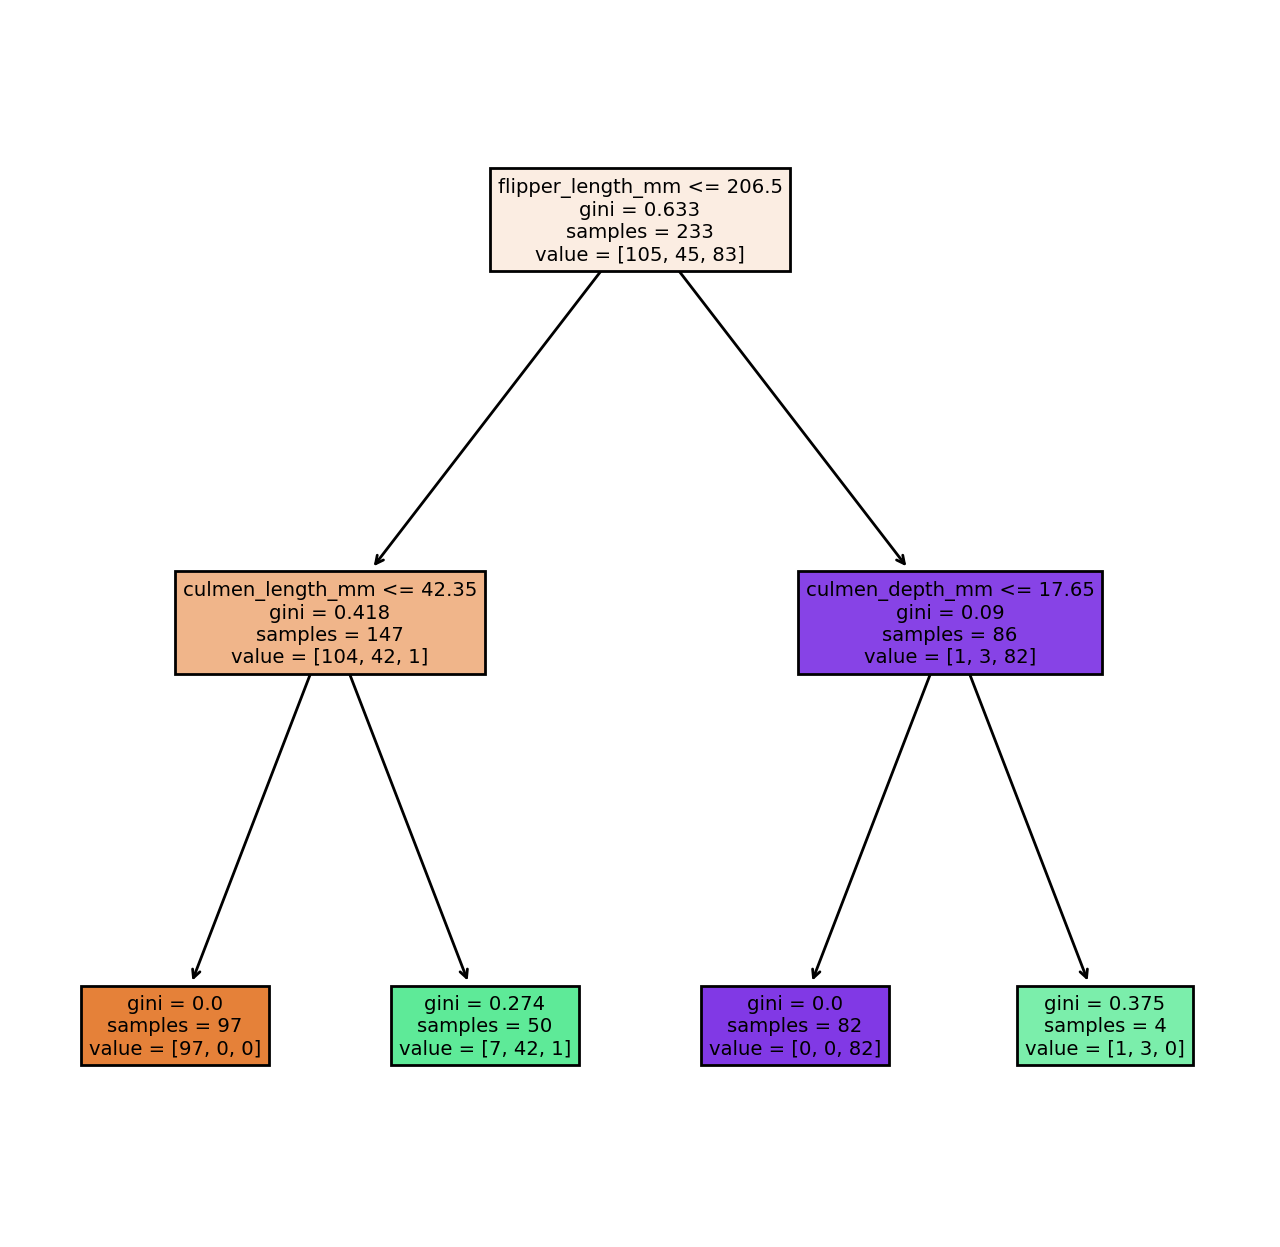

In [96]:
ModelReport(prune_tree_model)

Max leaf 

In [97]:
max_leaf_model = DecisionTreeClassifier(max_leaf_nodes=3)

In [99]:
max_leaf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





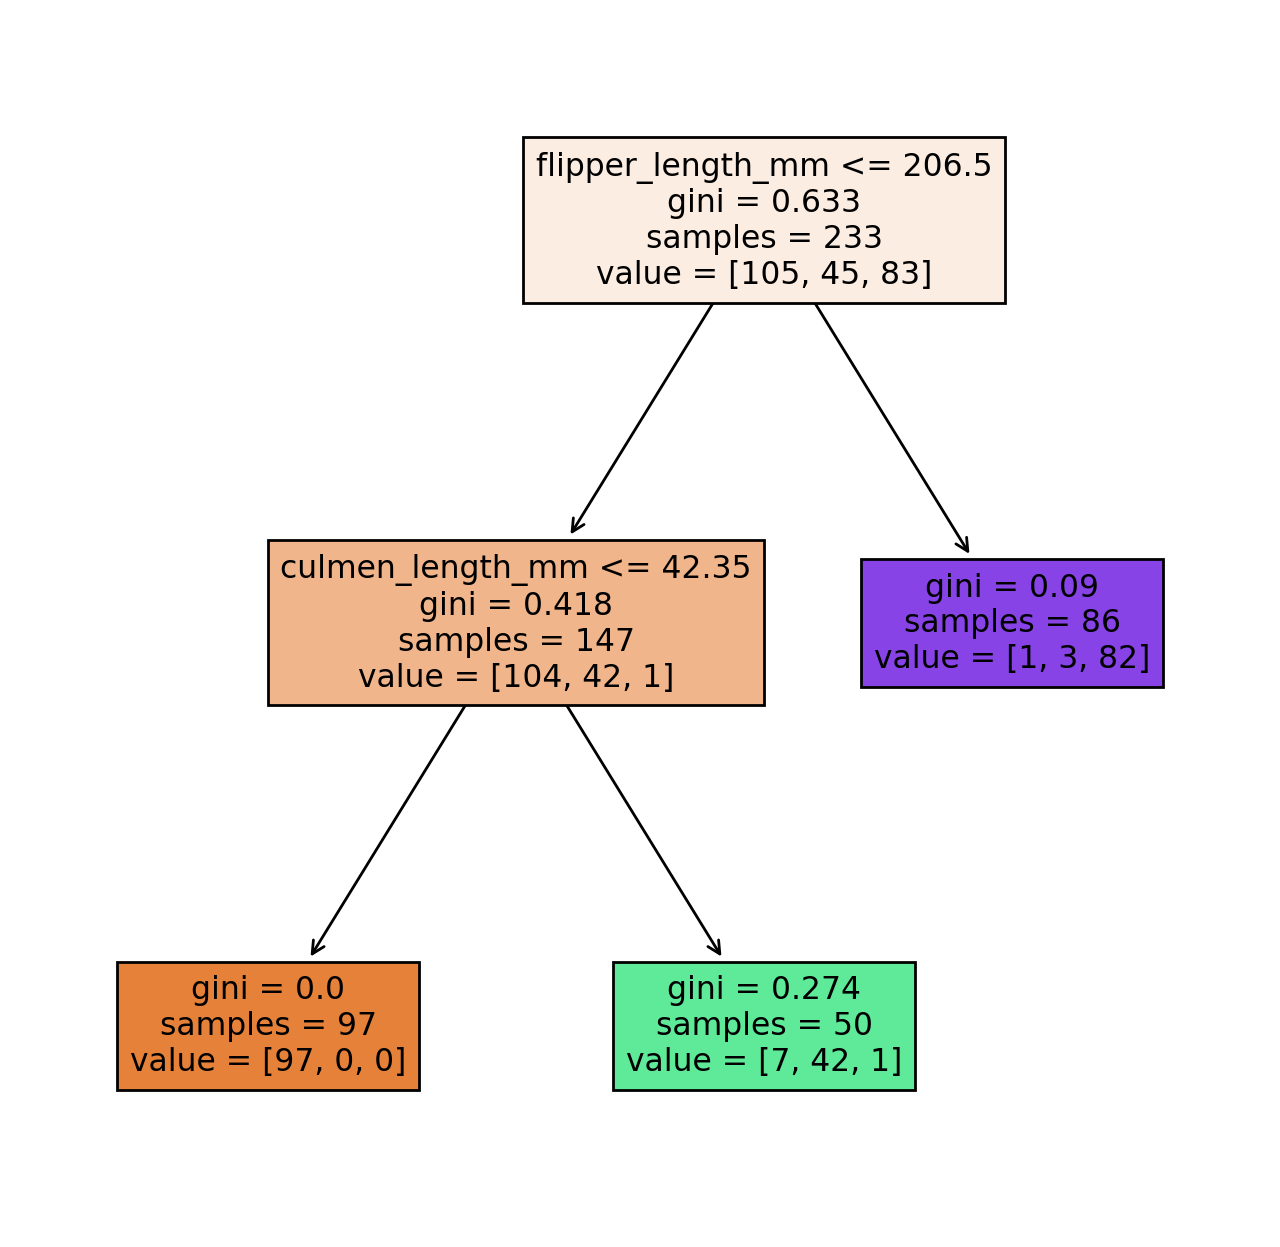

In [100]:
ModelReport(max_leaf_model)

## Criterion

In [101]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





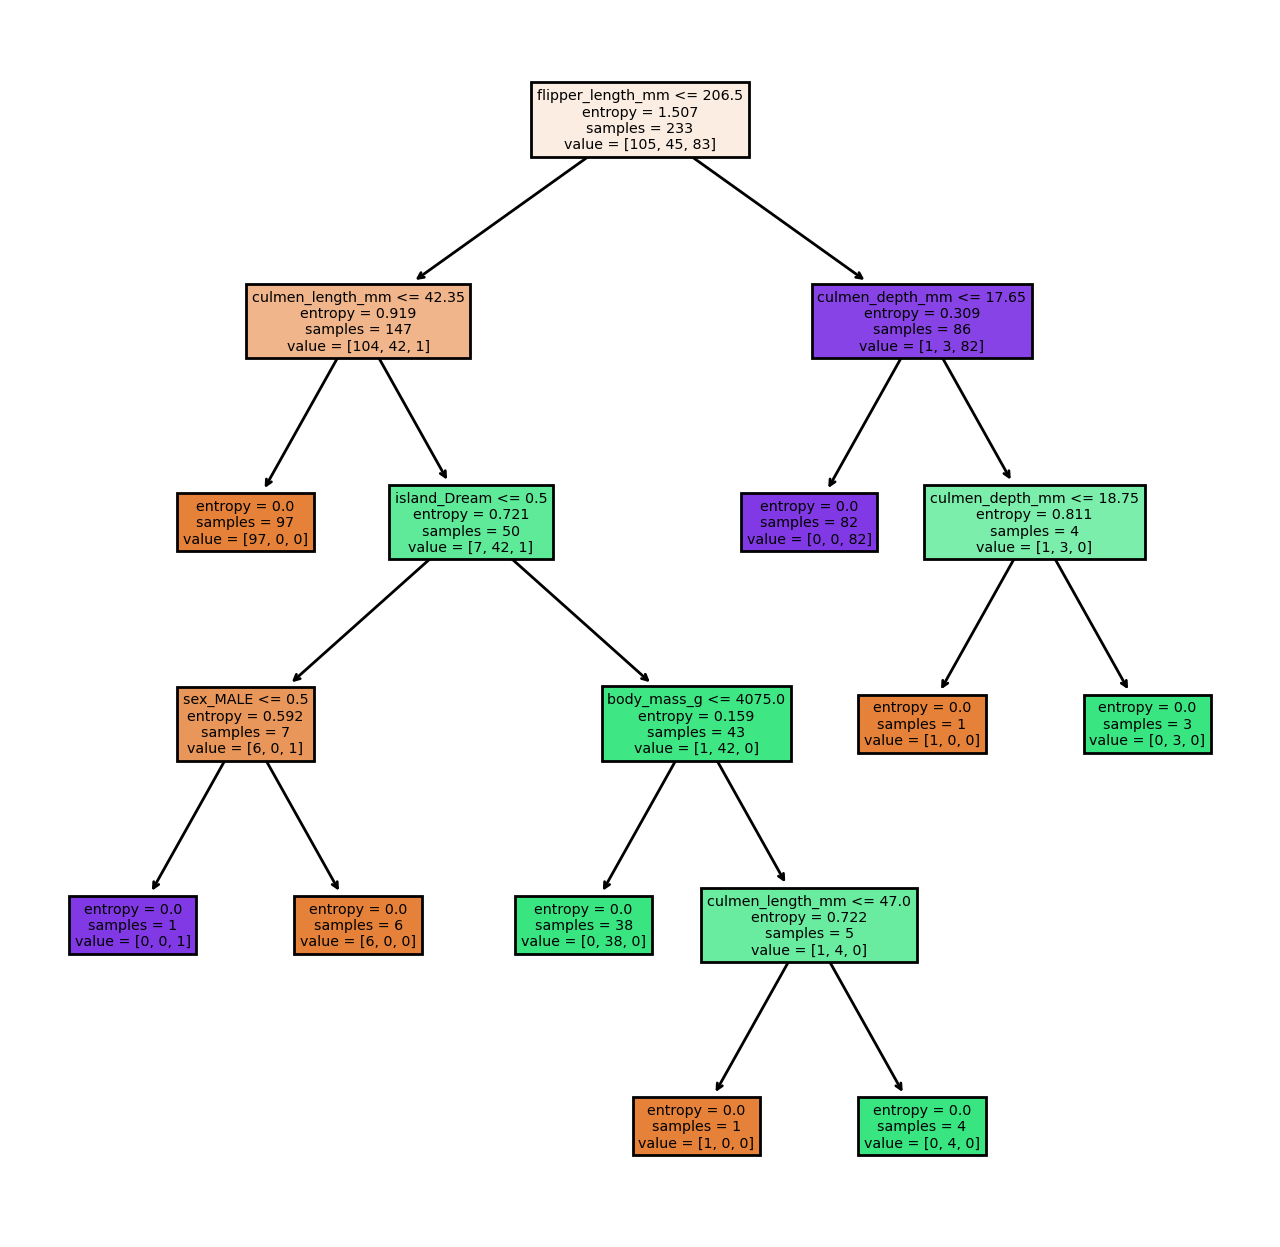

In [102]:
ModelReport(entropy_tree)

THE END